# Classification problem in German credit data

## Introduction

We want to 'train' using python for machine learning applications. In this notebook we are going to analyze the 
**Statlog (German Credit Data)** Data Set, avaible thanks to Dua, D. and Graff, C. (2019) at [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science. In this dataset the profiles of the clients of some German banks are stored, in particular they are described as good or bad credit risks. Let's load the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
credit = pd.read_csv('data\credit-g.csv')
credit.info()
credit.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings','1<=X<4',2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,'500<=X<1000','>=7',3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,'0<=X<200',36,'existing paid','used car',6948,'<100','1<=X<4',2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,'>=1000','4<=X<7',2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,'0<=X<200',30,'critical/other existing credit','new car',5234,'<100',unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


We have : 
- checking_status : status of existing checking account, in Deutsche Mark.
- duration	: duration in month.
- credit_history : History of the credits given to the client.
- purpose :	purpose of the credit 
- credit_amount : amount of the credit
- savings_status : status of savings account/bonds, in Deutsche Mark.
- employment : number of years of the present employment.
- installment_commitment : 	
- personal_status :marital status and sex
- other_parties	: other debtors / guarantors
- residence_since : 
- property_magnitude : properties of the client	
- age :	age of the client
- other_payment_plans : other installment plans
- housing : the state of client's house
- existing_credits : number of existing credits at this bank
- job :	expertise of the client
- num_dependents : number of people being liable to provide maintenance for
- own_telephone	: If the client has a telephone or not
- foreign_worker : If the client is a foreigner
- class : If the client is good or bad credit risks

We want to predict if client's profile is good or bad. To achieve this purpose we need a classification algorithm. We could use a simple **Decision tree** or a more sophisticated **Random Forest** or,why not a **Logistic Regression**,using scikit-learn libraries : [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Let's work on the textual fields in the dataset.

## Preprocessing

We do a **one hot encoding** transformation on the string fields in the dataset because scikit-learn libray for classification use only numerical fields. In pandas there is [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function for this kind of problem.

In [2]:
features = ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']

credit= pd.get_dummies(credit,columns = features)
    

In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
duration                                           1000 non-null int64
credit_amount                                      1000 non-null int64
installment_commitment                             1000 non-null int64
residence_since                                    1000 non-null int64
age                                                1000 non-null int64
existing_credits                                   1000 non-null int64
num_dependents                                     1000 non-null int64
class                                              1000 non-null object
checking_status_'0<=X<200'                         1000 non-null uint8
checking_status_'<0'                               1000 non-null uint8
checking_status_'>=200'                            1000 non-null uint8
checking_status_'no checking'                      1000 non-null uint8
credit_history_'all paid'                

We have doubled the number of features ($\sim$ 50 ). Usually it's not a good idea to increase the number of features, on the contrary it's important to reduce the number of features to use only the more 'useful'(PCA algorithm).

Let's divide the target in the datset from the whole dataset.

In [3]:
X = credit.drop(['class'],axis = 1)

Let's encode the target field (good,bad = 0,1).

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = credit['class'].values
Y = le.fit_transform(Y)
le.classes_

array(['bad', 'good'], dtype=object)

Let's prepare the train,validation and test set with a well defined percentage distribution of data :(X_train =70% X, X_valid = 15% X, X_test = 15% X).

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_valid,Y_train,Y_valid = train_test_split(X,Y,test_size = 0.15, random_state  = 0 )
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size = 0.176, random_state  = 0 )

print(X_train.shape,X_valid.shape,X_test.shape)

(700, 61) (150, 61) (150, 61)


Let's normalize the features.

In [6]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_valid = mm.transform(X_valid)
X_test = mm.transform(X_test)


## Analysis : Decision Tree VS Random Forest vs Logistic Regression

Let's develop the model and let's tune the deepness of the tree. It's our hyperparameter.

In [7]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,20):
    dtc = DecisionTreeClassifier(criterion ='entropy',max_depth = i,random_state  = 42)
    dtc.fit(X_train,Y_train)
    
    Y_train_predict = dtc.predict(X_train)
    Y_valid_predict =  dtc.predict(X_valid)

    class_proba = dtc.predict_proba(X_valid)

    accuracy_valid= dtc.score(X_test,Y_test)
    accuracy_train= dtc.score(X_train,Y_train)

    print('Accuracy on train set = %f, accuracy on validation set = %f with max_depth = %d' %(accuracy_train,accuracy_valid,i))






Accuracy on train set = 0.682857, accuracy on validation set = 0.740000 with max_depth = 1
Accuracy on train set = 0.682857, accuracy on validation set = 0.740000 with max_depth = 2
Accuracy on train set = 0.725714, accuracy on validation set = 0.740000 with max_depth = 3
Accuracy on train set = 0.750000, accuracy on validation set = 0.733333 with max_depth = 4
Accuracy on train set = 0.782857, accuracy on validation set = 0.726667 with max_depth = 5
Accuracy on train set = 0.815714, accuracy on validation set = 0.673333 with max_depth = 6
Accuracy on train set = 0.831429, accuracy on validation set = 0.713333 with max_depth = 7
Accuracy on train set = 0.848571, accuracy on validation set = 0.686667 with max_depth = 8
Accuracy on train set = 0.880000, accuracy on validation set = 0.640000 with max_depth = 9
Accuracy on train set = 0.887143, accuracy on validation set = 0.666667 with max_depth = 10
Accuracy on train set = 0.924286, accuracy on validation set = 0.686667 with max_depth = 

We can the tuning of the hyperparameters using [GridSerchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class. It's in scikit-learn.

In [79]:
from sklearn.model_selection import GridSearchCV

dtcg = DecisionTreeClassifier()
param = [{'criterion':['entropy','gini'],'max_depth':[el for el in range(1,20)],'random_state': [42]}]
gridsearch = GridSearchCV(dtcg,param,scoring = 'accuracy',return_train_score = True,cv = 3)# with cv = None it uses 5-fold cross validation
gridsearch.fit(X_train,Y_train)
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'random_state': 42}

We can see that the best value for the deepness(*max_depth* parameter) of the decision tree is i = 3 when i've started the kernel. Besides we can see the presence of a strong overfitting. 

In [22]:
dtc = DecisionTreeClassifier(criterion ='entropy',max_depth = 3,random_state  = 42)
dtc.fit(X_train,Y_train)
Y_test_predict =  dtc.predict(X_test)
class_proba_test = dtc.predict_proba(X_test)
accuracy_test= dtc.score(X_test,Y_test)
print('Accuracy on test set = %f' %(accuracy_test))

Accuracy on test set = 0.740000


We evaluate other metrics that characterize a classification problem: *precision*, *recall* and *F1*

In [12]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

cm = confusion_matrix(Y_test,Y_test_predict)
p = precision_score(Y_test,Y_test_predict)
r = recall_score(Y_test,Y_test_predict)
f1 = f1_score(Y_test,Y_test_predict)
print('Precision, recall ad F1 are: %f, %f and %f'%(p,r,f1))

Precision, recall ad F1 are: 0.776923, 0.909910 and 0.838174


Let's plot the roc curve and the roc/auc ratio. 

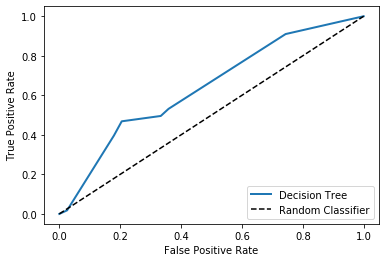

0.6402171402171402

In [41]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
Y_scores_test_tree = class_proba_test[:,1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_test,Y_scores_test_tree)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--',label = 'Random Classifier') # dashed diagonal represents a pure random classifier 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(Y_test,Y_scores_test_tree)

In [14]:
from sklearn.ensemble import RandomForestClassifier
trees = []
for j in range(2,200):
    rfc = RandomForestClassifier(n_estimators = j ,criterion ='entropy',max_depth = 3,random_state  = 42)
    rfc.fit(X_train,Y_train)
    trees.append(rfc.estimators_)
    
    Y_train_predict = rfc.predict(X_train)
    Y_valid_predict =  rfc.predict(X_valid)

    class_proba = rfc.predict_proba(X_valid)

    accuracy_valid= rfc.score(X_valid,Y_valid)
    accuracy_train= rfc.score(X_train,Y_train)

    print('Accuracy on train set = %f, accuracy on validation set = %f with n_estimators = %d' %(accuracy_train,accuracy_valid,j))


Accuracy on train set = 0.730000, accuracy on validation set = 0.700000 with n_estimators = 2
Accuracy on train set = 0.741429, accuracy on validation set = 0.720000 with n_estimators = 3
Accuracy on train set = 0.740000, accuracy on validation set = 0.733333 with n_estimators = 4
Accuracy on train set = 0.738571, accuracy on validation set = 0.740000 with n_estimators = 5
Accuracy on train set = 0.738571, accuracy on validation set = 0.726667 with n_estimators = 6
Accuracy on train set = 0.738571, accuracy on validation set = 0.733333 with n_estimators = 7
Accuracy on train set = 0.744286, accuracy on validation set = 0.746667 with n_estimators = 8
Accuracy on train set = 0.744286, accuracy on validation set = 0.733333 with n_estimators = 9
Accuracy on train set = 0.765714, accuracy on validation set = 0.726667 with n_estimators = 10
Accuracy on train set = 0.764286, accuracy on validation set = 0.726667 with n_estimators = 11
Accuracy on train set = 0.764286, accuracy on validation s

Accuracy on train set = 0.714286, accuracy on validation set = 0.740000 with n_estimators = 89
Accuracy on train set = 0.714286, accuracy on validation set = 0.740000 with n_estimators = 90
Accuracy on train set = 0.714286, accuracy on validation set = 0.740000 with n_estimators = 91
Accuracy on train set = 0.714286, accuracy on validation set = 0.740000 with n_estimators = 92
Accuracy on train set = 0.715714, accuracy on validation set = 0.740000 with n_estimators = 93
Accuracy on train set = 0.714286, accuracy on validation set = 0.740000 with n_estimators = 94
Accuracy on train set = 0.715714, accuracy on validation set = 0.746667 with n_estimators = 95
Accuracy on train set = 0.715714, accuracy on validation set = 0.746667 with n_estimators = 96
Accuracy on train set = 0.715714, accuracy on validation set = 0.740000 with n_estimators = 97
Accuracy on train set = 0.717143, accuracy on validation set = 0.746667 with n_estimators = 98
Accuracy on train set = 0.715714, accuracy on vali

Accuracy on train set = 0.712857, accuracy on validation set = 0.733333 with n_estimators = 175
Accuracy on train set = 0.714286, accuracy on validation set = 0.733333 with n_estimators = 176
Accuracy on train set = 0.714286, accuracy on validation set = 0.733333 with n_estimators = 177
Accuracy on train set = 0.714286, accuracy on validation set = 0.733333 with n_estimators = 178
Accuracy on train set = 0.712857, accuracy on validation set = 0.733333 with n_estimators = 179
Accuracy on train set = 0.712857, accuracy on validation set = 0.733333 with n_estimators = 180
Accuracy on train set = 0.712857, accuracy on validation set = 0.733333 with n_estimators = 181
Accuracy on train set = 0.712857, accuracy on validation set = 0.733333 with n_estimators = 182
Accuracy on train set = 0.712857, accuracy on validation set = 0.733333 with n_estimators = 183
Accuracy on train set = 0.714286, accuracy on validation set = 0.733333 with n_estimators = 184
Accuracy on train set = 0.714286, accura

In [98]:
rfcg = RandomForestClassifier()
param = [{'n_estimators' :[el for el in range(2,200)], 'criterion' :['entropy'],'max_depth' :[3],'random_state' : [42]}]
gridsearch = GridSearchCV(rfcg,param,scoring = 'accuracy',return_train_score = True,cv = 3)
gridsearch.fit(X_train,Y_train)
gridsearch.best_params_


{'criterion': 'entropy',
 'max_depth': 3,
 'n_estimators': 13,
 'random_state': 42}

In [44]:
rfc = RandomForestClassifier(n_estimators = 74 ,criterion ='entropy',max_depth = 3,random_state  = 42)
rfc.fit(X_train,Y_train)
trees = rfc.estimators_

Y_test_predict =  rfc.predict(X_test)
class_proba = rfc.predict_proba(X_test)

accuracy_test= rfc.score(X_test,Y_test)
print('Accuracy on test set = %f' %(accuracy_test))    

Accuracy on test set = 0.760000


In [17]:
cm = confusion_matrix(Y_test,Y_test_predict)
p = precision_score(Y_test,Y_test_predict)
r = recall_score(Y_test,Y_test_predict)
f1 = f1_score(Y_test,Y_test_predict)
print('Precision, recall ad F1 are: %f, %f and %f'%(p,r,f1))


Precision, recall ad F1 are: 0.755102, 1.000000 and 0.860465


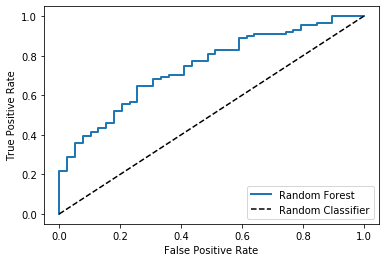

0.7438207438207439

In [45]:
Y_scores_test_forest = class_proba[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_test,Y_scores_test_forest)



plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(Y_test,Y_scores_test_forest)

We can see that there are several good values for the number of trees in the forest(*n_estimators* parameter). I've chosen  j=74 when i start the kernel,even if GridSearchCv has advised j=13 with the same result(you can try). Besides we can still see the presence of overfitting but it is lower than the single decisione tree, thanks to the ensemble method.  

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
accuracy_tr = {}
accuracy_v = {}
dic_train = {}
hyperparameters = [('l2','lbfgs'),('l2','newton-cg',),('l2','sag'),('l2','sag'),('l1','saga')]

for couple in hyperparameters:
    lr  = LogisticRegression( random_state=42,penalty = couple[0], solver = couple[1])
    lr.fit(X_train,Y_train)
    Y_predict_train = lr.predict(X_train)
    Y_predict_valid = lr.predict(X_valid)
    
    accuracy_tr[couple] = accuracy_score(Y_train,Y_predict_train)# I save in a dictionary the hyperparameters as (tuple) keya and with accuracy as value.
    accuracy_v[couple] = accuracy_score(Y_valid,Y_predict_valid)# See above.
    
for key in dic_train:
    print(key,accuracy_tr[key],accuracy_v[key])


So we chose, as hyperparameters of the logistic regression on the test set, a **L1 regularization**, *penalty = 'l1'* , and an optimization algorithm called **SAGA**,*solver = 'saga'*. This algorithm combine simulated annealing and genetic algorithm.

In [46]:
lr  = LogisticRegression( random_state=42,penalty = 'l1', solver = 'saga')
lr.fit(X_train,Y_train)
Y_predict_test = lr.predict(X_test)
class_proba = lr.predict_proba(X_test)
accuracy_t = accuracy_score(Y_test,Y_predict_test)

print('Accuracy on train set %f,accuracy on validation set %f and accuracy on test set %f'%(accuracy_tr[('l1','saga')],accuracy_v[('l1','saga')],accuracy_t))

Accuracy on train set 0.798571,accuracy on validation set 0.720000 and accuracy on test set 0.746667


In [47]:
cm = confusion_matrix(Y_test,Y_test_predict)
p = precision_score(Y_test,Y_predict_test)
r = recall_score(Y_test,Y_predict_test)
f1 = f1_score(Y_test,Y_predict_test)
print('Precision, recall ad F1 are: %f, %f and %f'%(p,r,f1))


Precision, recall ad F1 are: 0.801653, 0.873874 and 0.836207


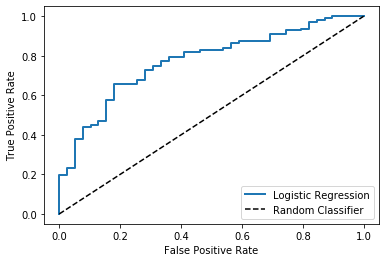

0.7722337722337722

In [48]:
Y_scores_test_logistic = class_proba[:,1]
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(Y_test,Y_scores_test_logistic)



plot_roc_curve(fpr_logistic, tpr_logistic, "Logistic Regression")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(Y_test,Y_scores_test_logistic)

Let's visualize the tree devolped with the DecisionTreeClassifier. We need to install [graphviz](http://www.graphviz.org/) and to execute the following script. After that, we will have the tree in a file.dot to converte. We have to open the shell in the graphviz folder,precisely **bin** folder, as administrator and excute the command :**dot -Tps filename.dot -o outfile.png**   ( .png if you want a file.png but there are others file extentions).

In [154]:
from sklearn.tree import export_graphviz

dotfile = open("dtc.dot", 'w')
export_graphviz(dtc, out_file = dotfile, feature_names = credit.columns.drop("class"),class_names = 'class')
dotfile.close()



## Conclusions

At the end of this analysis we can say:
- Preprocessing the data it's not an option : it's the starting point and essential part of the whole work. We have to look carefully and straight in the "eyes of the dataset"
- Decision Tree and Random Forest are very powerful algorithms for classification. Random Forest,in particular, is more stable than a simple Decision Tree. Even Logistic Regression is a very good algorithm for (binary) classification: in this case is better than a Decision Tree and it is comparable with a Random Forest.
- The tuning of the hyperparameters is a thorny part in the test of the model.
<br><br>
We can compare our results for the accuracy of the models with that presents in the pipelines ad this [link](https://www.openml.org/t/31). Not bad!

## Bonus : Support Vector Machine for classification

 Let's use a linear support vector machine for the previous classification task.

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
lsvc = LinearSVC(penalty = 'l2',C = 0.01,random_state=42,dual=True)
lsvc.fit(X_train,Y_train)
Y_pred_val = lsvc.predict(X_valid) 
Y_pred_train = lsvc.predict(X_train)
accuracy_tr = accuracy_score(Y_train,Y_pred_train)
accuracy_val = accuracy_score(Y_valid,Y_pred_val)


In [9]:
print(accuracy_tr,accuracy_val)

0.7871428571428571 0.74


In [11]:
from sklearn.model_selection import GridSearchCV
param = [{'penalty':['l1','l2'],'C':[0.01,0.1,1],'loss':['squared_hinge'],'dual':[False],'random_state':[42]}]
lsvcg = LinearSVC()
grid_search = GridSearchCV(lsvcg,param,scoring = 'accuracy', return_train_score = True,cv = 3)
grid_search.fit(X_train,Y_train)

print('The best estimator is:\n',grid_search.best_estimator_,'\n')
print('The accuracy of the best estimator is',grid_search.best_score_,'\n')
print('The list of the parameters for the best estimator is:\n',grid_search.best_params_)

The best estimator is:
 LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0) 

The accuracy of the best estimator is 0.7528571428571429 

The list of the parameters for the best estimator is:
 {'C': 0.01, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2', 'random_state': 42}


In [57]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
lsvc = LinearSVC(penalty = 'l2',C = 0.01,random_state=42,dual=True)
lsvc.fit(X_train,Y_train)
Y_predict_test = lsvc.predict(X_test) 
accuracy_test= accuracy_score(Y_test,Y_predict_test)

cc = CalibratedClassifierCV(base_estimator = lsvc, cv = 3)
cc.fit(X_train,Y_train)
class_proba = cc.predict_proba(X_test)
Y_scores_test_lsvc = class_proba[:,1]

cm = confusion_matrix(Y_test,Y_predict_test)
p = precision_score(Y_test,Y_predict_test)
r = recall_score(Y_test,Y_predict_test)
f1 = f1_score(Y_test,Y_predict_test)

print(' The accuracy,the precision,the recall and the f1 score are: %.2f, %.2f, %.2f, %.2f' %(accuracy_test,p,r,f1))


 The accuracy,the precision,the recall and the f1 score are: 0.73, 0.78, 0.89, 0.83


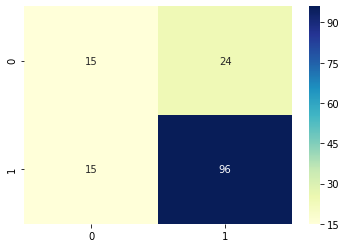

In [48]:
import seaborn as sb
cm
sb.heatmap(cm,annot =True, cmap="YlGnBu")


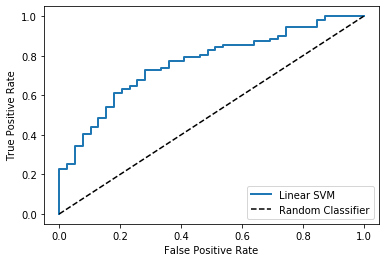

0.7639177639177639


In [50]:
fpr_lsvm,tpr_lsvm,thresholds_lsvm = roc_curve(Y_test,Y_scores_test_lsvc)

plot_roc_curve(fpr_lsvm, tpr_lsvm, "Linear SVM")
plt.legend(loc="lower right")
plt.show()

rc = roc_auc_score(Y_test,Y_scores_test_lsvc)
print(rc)

This classifier performs better,on this data, than decision tree and random forest too,even if it has the 100%  recall, but a little worse than the logistic regression. We could compare the auc,the precision and the recall of these two classifier to choose the most useful: if we were interested in a more precise classifier we could choose the logistic regression model ( precision = 0.80),  if we were interested in a higher recall classifier we cpuld choose the linear support vector machine( recall = 0.87).